In [8]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
from sklearn.model_selection import train_test_split


def create_dataset():
    df = pd.read_csv('Datasets/sonar.all-data', header=None)

    X = df.drop(labels=60, axis=1)
    Y = df[60]

    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)

    X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.1, random_state=42)

    return df, X_train, X_test, y_train, y_test

In [10]:
df, X_train, X_test, y_train, y_test = create_dataset()

In [11]:
print(len(df), len(X_train), len(X_test), sep='\n')

208
187
21


In [12]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [13]:
def create_error_report(model_N_layers, dataset=create_dataset(), metrics: str = 'accuracy', epochs: int = 100, batch_size: int = 10, validation_split: float = 0.1):
    X_train_in = dataset[1]
    y_train_in = dataset[3]

    history = model_N_layers.fit(X_train_in, y_train_in, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    history_df = pd.DataFrame(history.history)

    fig, axes = plt.subplots(1, 2, figsize=(15,7))

    sns.lineplot(data=history_df[f'val_{metrics}'], ax=axes[0])
    axes[0].set_title(metrics)

    sns.lineplot(data=history_df['val_loss'], ax=axes[1])
    axes[1].set_title('Loss')

    model_N_layers.evaluate(X_test, y_test)


    return history_df
    

Epoch 1/100


C:\Users\sanya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5309 - loss: 0.6918 - val_accuracy: 0.7368 - val_loss: 0.6888
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7101 - loss: 0.6847 - val_accuracy: 0.6316 - val_loss: 0.6785
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6447 - loss: 0.6809 - val_accuracy: 0.6316 - val_loss: 0.6738
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6867 - loss: 0.6689 - val_accuracy: 0.6316 - val_loss: 0.6667
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6812 - loss: 0.6585 - val_accuracy: 0.6842 - val_loss: 0.6618
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7314 - loss: 0.6462 - val_accuracy: 0.7895 - val_loss: 0.6521
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7472 - loss: 0.6296 - val_accuracy: 0.8421 - val_loss: 0.6408
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7476 - loss: 0.6109 - val_accuracy: 0.7895 - val_loss: 0.

,accuracy,loss,val_accuracy,val_loss
0,0.517857,0.692387,0.736842,0.688845
1,0.666667,0.684435,0.631579,0.678497
2,0.666667,0.677372,0.631579,0.673755
3,0.654762,0.668208,0.631579,0.666745
4,0.666667,0.656734,0.684211,0.661800
...,...,...,...,...
95,0.886905,0.275373,0.684211,0.642328
96,0.892857,0.271656,0.684211,0.640581
97,0.898810,0.273986,0.684211,0.615866
98,0.886905,0.269011,0.684211,0.632984


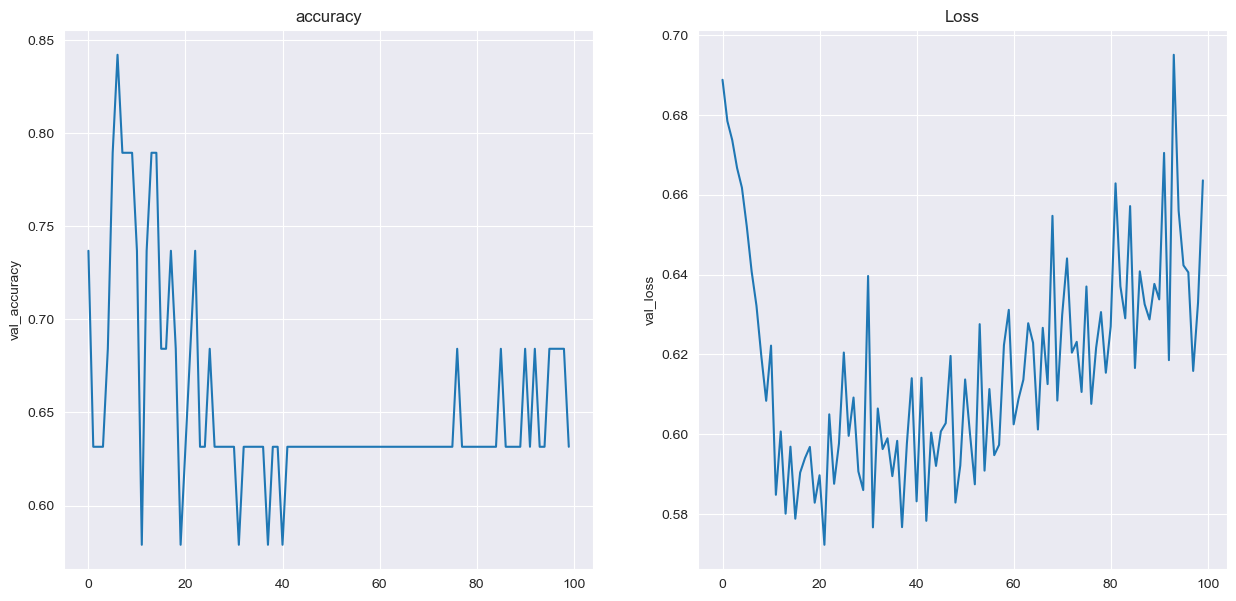

In [14]:
baseline_model = Sequential()
baseline_model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100


C:\Users\sanya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5619 - loss: 0.6922 - val_accuracy: 0.4737 - val_loss: 0.6928
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6344 - loss: 0.6903 - val_accuracy: 0.6316 - val_loss: 0.6889
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6702 - loss: 0.6868 - val_accuracy: 0.6842 - val_loss: 0.6866
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - loss: 0.6823 - val_accuracy: 0.6316 - val_loss: 0.6818
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6183 - loss: 0.6805 - val_accuracy: 0.6316 - val_loss: 0.6788
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6749 - loss: 0.6755 - val_accuracy: 0.6316 - val_loss: 0.6742
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6618 - loss: 0.6662 - val_accuracy: 0.5789 - val_loss: 0.6695
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7083 - loss: 0.6541 - val_accuracy: 0.5789 - val_loss: 0.

,accuracy,loss,val_accuracy,val_loss
0,0.500000,0.692017,0.473684,0.692837
1,0.678571,0.689023,0.631579,0.688944
2,0.684524,0.685957,0.684211,0.686582
3,0.702381,0.682119,0.631579,0.681777
4,0.684524,0.677034,0.631579,0.678797
...,...,...,...,...
95,0.875000,0.332771,0.631579,0.634200
96,0.863095,0.347117,0.631579,0.622125
97,0.869048,0.336786,0.684211,0.603444
98,0.875000,0.340306,0.631579,0.634065


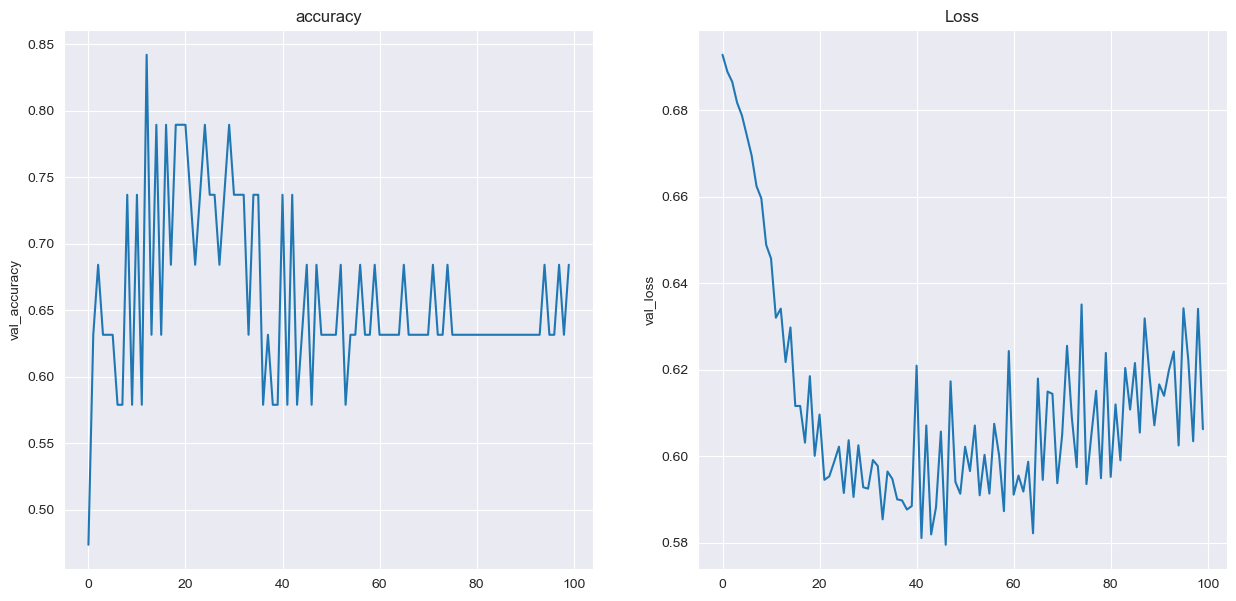

In [15]:
baseline_model = Sequential()
baseline_model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100


C:\Users\sanya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4591 - loss: 0.6937 - val_accuracy: 0.6316 - val_loss: 0.6914
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5119 - loss: 0.6921 - val_accuracy: 0.6316 - val_loss: 0.6915
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5722 - loss: 0.6913 - val_accuracy: 0.6316 - val_loss: 0.6898
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6517 - loss: 0.6891 - val_accuracy: 0.6316 - val_loss: 0.6867
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6627 - loss: 0.6863 - val_accuracy: 0.6316 - val_loss: 0.6844
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6978 - loss: 0.6763 - val_accuracy: 0.6316 - val_loss: 0.6764
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6506 - loss: 0.6704 - val_accuracy: 0.6316 - val_loss: 0.6730
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6953 - loss: 0.6500 - val_accuracy: 0.6316 - val_loss: 0.

,accuracy,loss,val_accuracy,val_loss
0,0.470238,0.693444,0.631579,0.691379
1,0.541667,0.692027,0.631579,0.691520
2,0.589286,0.690748,0.631579,0.689784
3,0.607143,0.688836,0.631579,0.686738
4,0.672619,0.684694,0.631579,0.684364
...,...,...,...,...
95,0.880952,0.275390,0.684211,0.747144
96,0.904762,0.265577,0.684211,0.680373
97,0.886905,0.266509,0.736842,0.755029
98,0.875000,0.287212,0.684211,0.673288


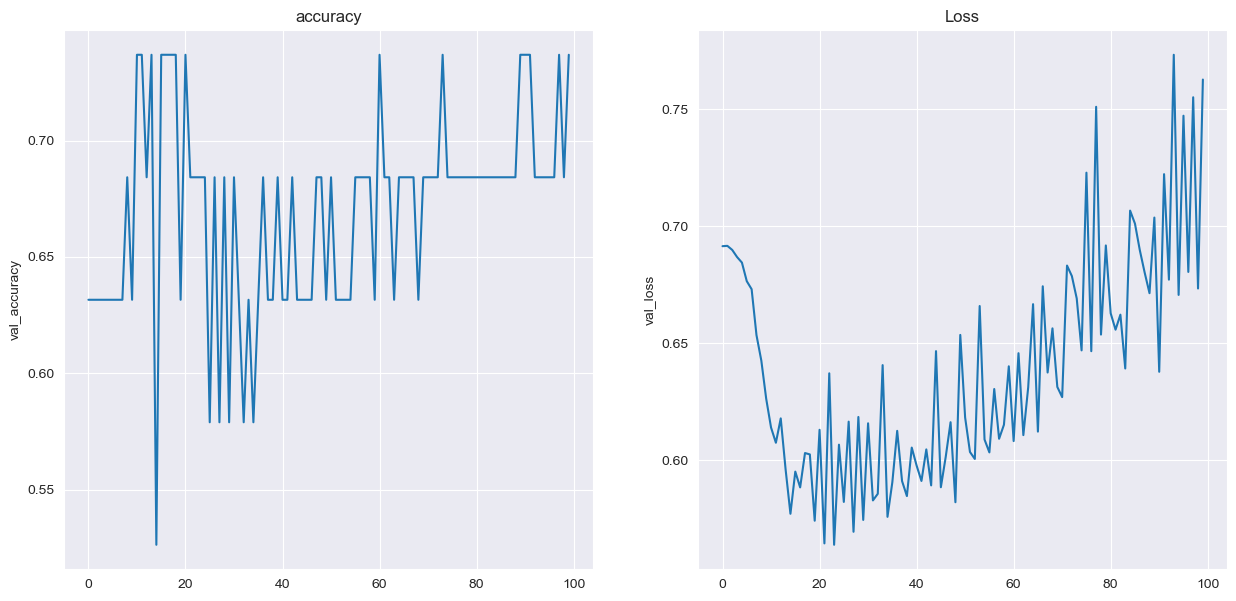

In [16]:
baseline_model = Sequential()
baseline_model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5295 - loss: 0.6932 - val_accuracy: 0.6316 - val_loss: 0.6927
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.6316 - val_loss: 0.6925
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5166 - loss: 0.6931 - val_accuracy: 0.6316 - val_loss: 0.6925
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4782 - loss: 0.6932 - val_accuracy: 0.6316 - val_loss: 0.6924
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4947 - loss: 0.6930 - val_accuracy: 0.6316 - val_loss: 0.6918
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4924 - loss: 0.6928 - val_accuracy: 0.6316 - val_loss: 0.6910
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5562 - loss: 0.6912 - val_accuracy: 0.6316 - val_loss: 0.6887
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5345 - loss: 0.6893 - val_accuracy: 0.6316 - 

,accuracy,loss,val_accuracy,val_loss
0,0.511905,0.693165,0.631579,0.692750
1,0.511905,0.693163,0.631579,0.692488
2,0.511905,0.693083,0.631579,0.692471
3,0.511905,0.693039,0.631579,0.692371
4,0.511905,0.692888,0.631579,0.691811
...,...,...,...,...
95,0.880952,0.318601,0.684211,0.636318
96,0.869048,0.317006,0.631579,0.656359
97,0.880952,0.303865,0.684211,0.700223
98,0.875000,0.306282,0.631579,0.658797


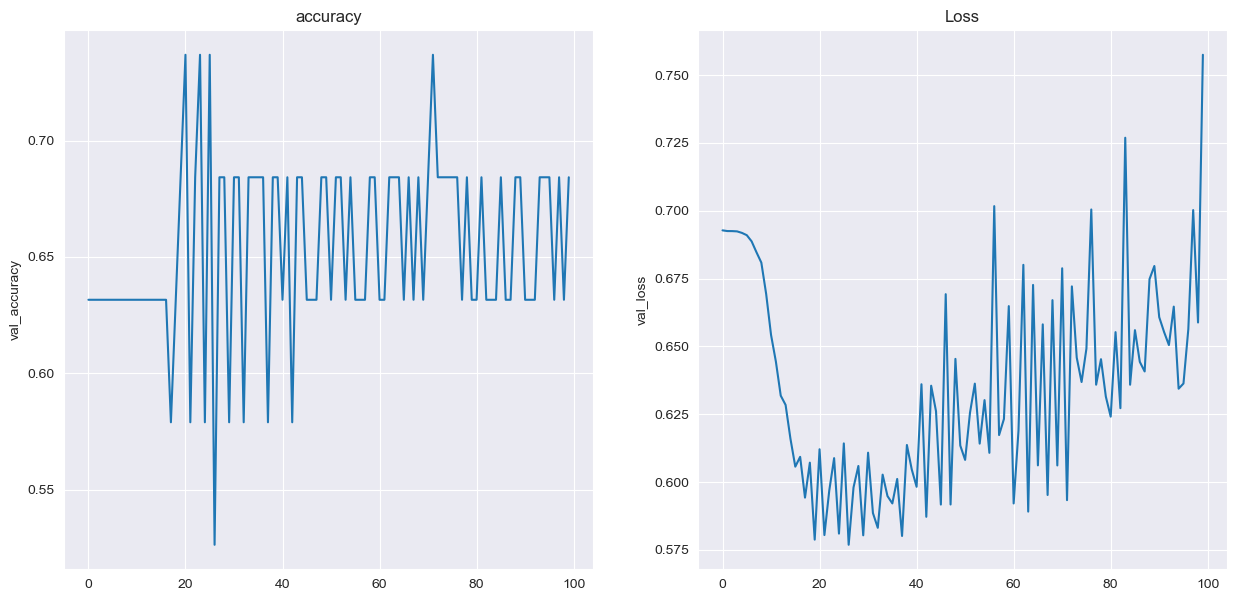

In [17]:
baseline_model = Sequential()
baseline_model.add(Dense(45, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(5, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(3, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5023 - loss: 0.6932 - val_accuracy: 0.6316 - val_loss: 0.6928
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4734 - loss: 0.6933 - val_accuracy: 0.6316 - val_loss: 0.6929
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5020 - loss: 0.6931 - val_accuracy: 0.6316 - val_loss: 0.6923
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5388 - loss: 0.6929 - val_accuracy: 0.6316 - val_loss: 0.6920
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4897 - loss: 0.6932 - val_accuracy: 0.6316 - val_loss: 0.6917
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5366 - loss: 0.6928 - val_accuracy: 0.6316 - val_loss: 0.6912
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5384 - loss: 0.6926 - val_accuracy: 0.6316 - val_loss: 0.6911
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5194 - loss: 0.6928 - val_accuracy: 0.6316 - 

,accuracy,loss,val_accuracy,val_loss
0,0.511905,0.693181,0.631579,0.692798
1,0.511905,0.693188,0.631579,0.692874
2,0.511905,0.693108,0.631579,0.692331
3,0.511905,0.693101,0.631579,0.691952
4,0.511905,0.693046,0.631579,0.691747
...,...,...,...,...
95,0.910714,0.298745,0.631579,0.740594
96,0.892857,0.315207,0.631579,0.742899
97,0.916667,0.292982,0.684211,0.686772
98,0.922619,0.282845,0.684211,0.675107


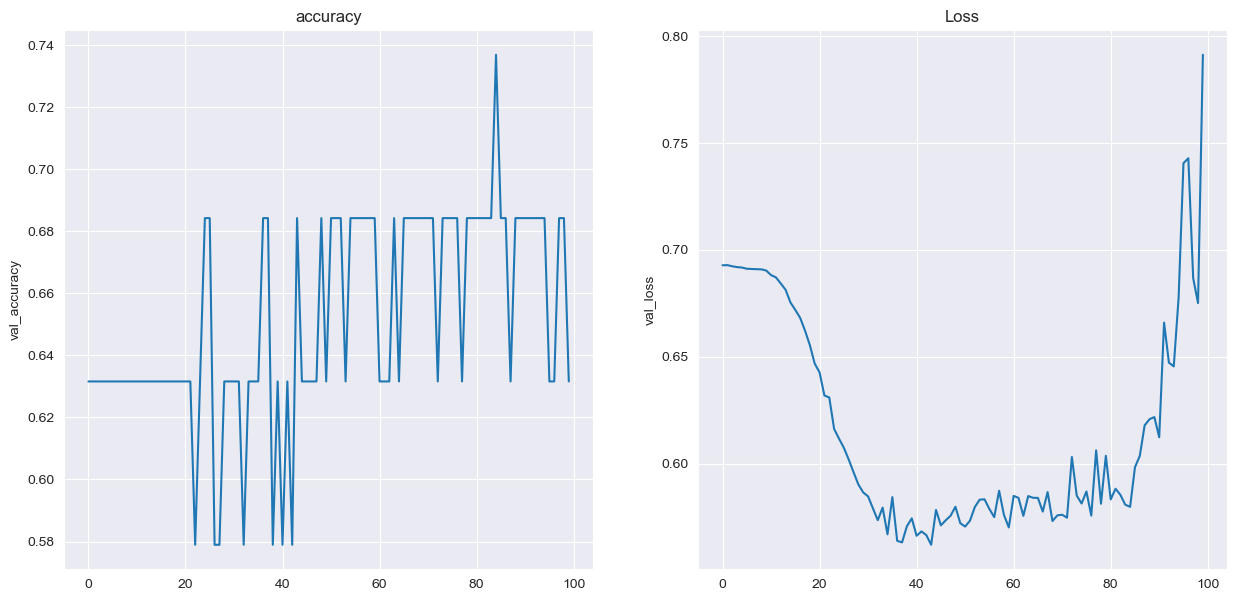

In [18]:
baseline_model = Sequential()
baseline_model.add(Dense(45, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(5, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(10, kernel_initializer='normal', activation='sigmoid'))
baseline_model.add(Dense(3, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5191 - loss: 0.6932 - val_accuracy: 0.6316 - val_loss: 0.6929
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5185 - loss: 0.6931 - val_accuracy: 0.6316 - val_loss: 0.6925
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5162 - loss: 0.6931 - val_accuracy: 0.6316 - val_loss: 0.6925
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5182 - loss: 0.6931 - val_accuracy: 0.6316 - val_loss: 0.6922
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5504 - loss: 0.6928 - val_accuracy: 0.6316 - val_loss: 0.6919
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4728 - loss: 0.6934 - val_accuracy: 0.6316 - val_loss: 0.6921
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5220 - loss: 0.6930 - val_accuracy: 0.6316 - val_loss: 0.6917
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4304 - loss: 0.6939 - val_accuracy: 0.6316 -

,accuracy,loss,val_accuracy,val_loss
0,0.511905,0.693157,0.631579,0.692878
1,0.511905,0.693164,0.631579,0.692485
2,0.511905,0.693107,0.631579,0.692491
3,0.511905,0.693096,0.631579,0.692211
4,0.511905,0.693141,0.631579,0.691946
...,...,...,...,...
95,0.910714,0.406920,0.578947,0.650566
96,0.904762,0.407278,0.578947,0.639832
97,0.916667,0.398956,0.684211,0.599638
98,0.910714,0.394133,0.578947,0.642282


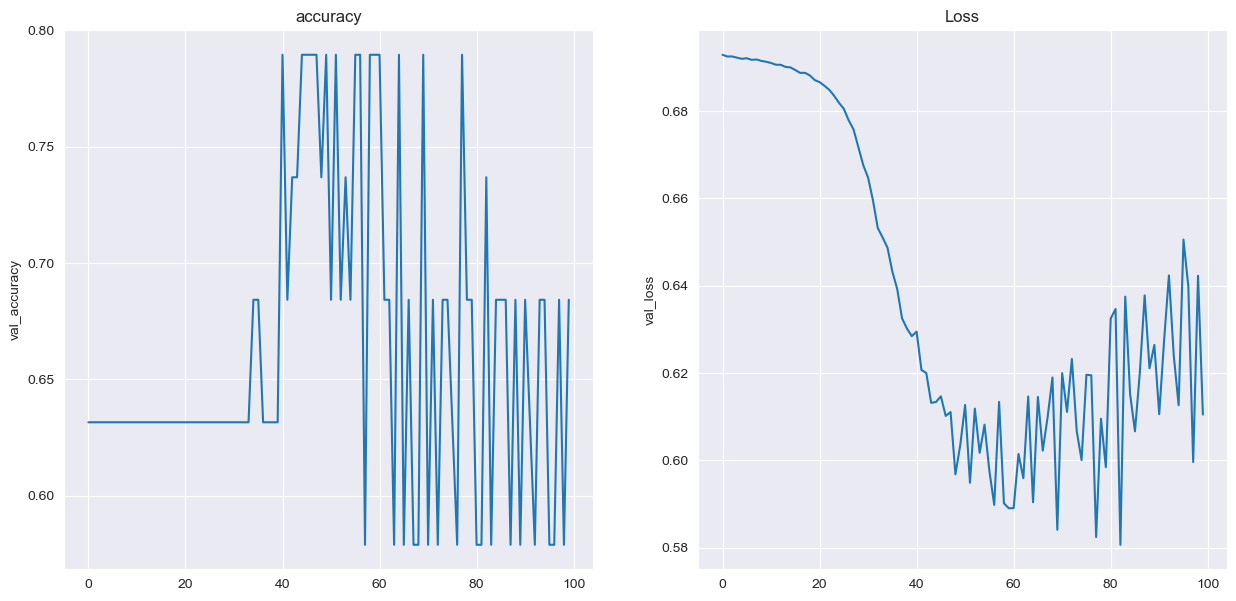

In [19]:
baseline_model = Sequential()
baseline_model.add(Dense(45, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(5, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
baseline_model.add(Dense(4, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4856 - loss: 0.6938 - val_accuracy: 0.4211 - val_loss: 0.6931
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6570 - loss: 0.6924 - val_accuracy: 0.6842 - val_loss: 0.6919
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7642 - loss: 0.6903 - val_accuracy: 0.6316 - val_loss: 0.6868
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7102 - loss: 0.6829 - val_accuracy: 0.7895 - val_loss: 0.6801
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6895 - loss: 0.6707 - val_accuracy: 0.6842 - val_loss: 0.6608
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6952 - loss: 0.6384 - val_accuracy: 0.7895 - val_loss: 0.6360
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7686 - loss: 0.5917 - val_accuracy: 0.7895 - val_loss: 0.6026
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7795 - loss: 0.5391 - val_accuracy: 0.8947 - 

,accuracy,loss,val_accuracy,val_loss
0,0.476190,0.693710,0.421053,0.693080
1,0.678571,0.692050,0.684211,0.691905
2,0.708333,0.689744,0.631579,0.686751
3,0.690476,0.681557,0.789474,0.680099
4,0.714286,0.664328,0.684211,0.660803
...,...,...,...,...
95,0.976190,0.084231,0.736842,0.570545
96,0.982143,0.068996,0.736842,0.617328
97,0.976190,0.069680,0.736842,0.655579
98,0.982143,0.067653,0.736842,0.701685


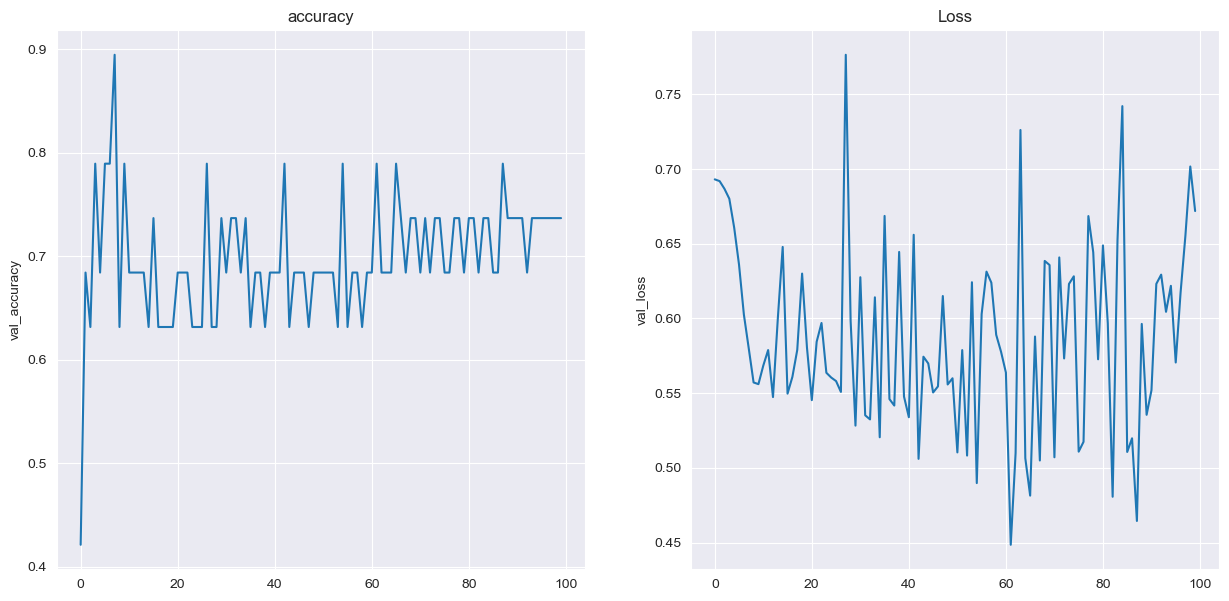

In [20]:
baseline_model = Sequential()
baseline_model.add(Dense(60, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5403 - loss: 0.6926 - val_accuracy: 0.6316 - val_loss: 0.6887
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5318 - loss: 0.6906 - val_accuracy: 0.6316 - val_loss: 0.6846
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5572 - loss: 0.6860 - val_accuracy: 0.6316 - val_loss: 0.6806
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5935 - loss: 0.6788 - val_accuracy: 0.6316 - val_loss: 0.6756
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6082 - loss: 0.6774 - val_accuracy: 0.6316 - val_loss: 0.6713
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6340 - loss: 0.6629 - val_accuracy: 0.6316 - val_loss: 0.6558
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6793 - loss: 0.6526 - val_accuracy: 0.7368 - val_loss: 0.6474
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7247 - loss: 0.6304 - val_accuracy: 0.6842 - 

,accuracy,loss,val_accuracy,val_loss
0,0.511905,0.692492,0.631579,0.688674
1,0.511905,0.690859,0.631579,0.684614
2,0.511905,0.688103,0.631579,0.680609
3,0.511905,0.684460,0.631579,0.675561
4,0.630952,0.679007,0.631579,0.671332
...,...,...,...,...
95,0.952381,0.158660,0.789474,0.560013
96,0.958333,0.149015,0.789474,0.547269
97,0.946429,0.154251,0.789474,0.551094
98,0.964286,0.144176,0.789474,0.609427


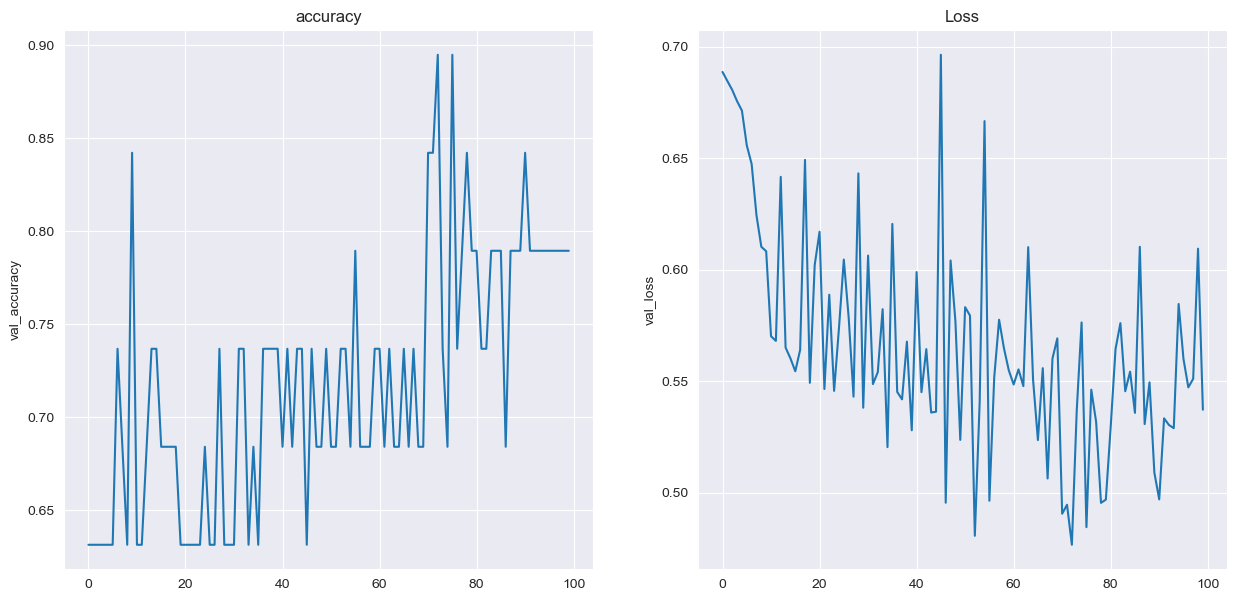

In [21]:
baseline_model = Sequential()
baseline_model.add(Dense(30, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4506 - loss: 0.6933 - val_accuracy: 0.6316 - val_loss: 0.6929
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5375 - loss: 0.6930 - val_accuracy: 0.6316 - val_loss: 0.6925
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5416 - loss: 0.6927 - val_accuracy: 0.6316 - val_loss: 0.6921
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5975 - loss: 0.6918 - val_accuracy: 0.6316 - val_loss: 0.6904
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6147 - loss: 0.6906 - val_accuracy: 0.6842 - val_loss: 0.6893
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7164 - loss: 0.6868 - val_accuracy: 0.5789 - val_loss: 0.6882
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6724 - loss: 0.6773 - val_accuracy: 0.7368 - val_loss: 0.6701
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7033 - loss: 0.6579 - val_accuracy: 0.7895 - 

,accuracy,loss,val_accuracy,val_loss
0,0.452381,0.693251,0.631579,0.692903
1,0.523810,0.692948,0.631579,0.692545
2,0.529762,0.692651,0.631579,0.692081
3,0.559524,0.692004,0.631579,0.690406
4,0.595238,0.690456,0.684211,0.689280
...,...,...,...,...
95,0.964286,0.134452,0.684211,0.821879
96,0.964286,0.145080,0.684211,0.937717
97,0.952381,0.141369,0.684211,0.723886
98,0.964286,0.124625,0.684211,0.820853


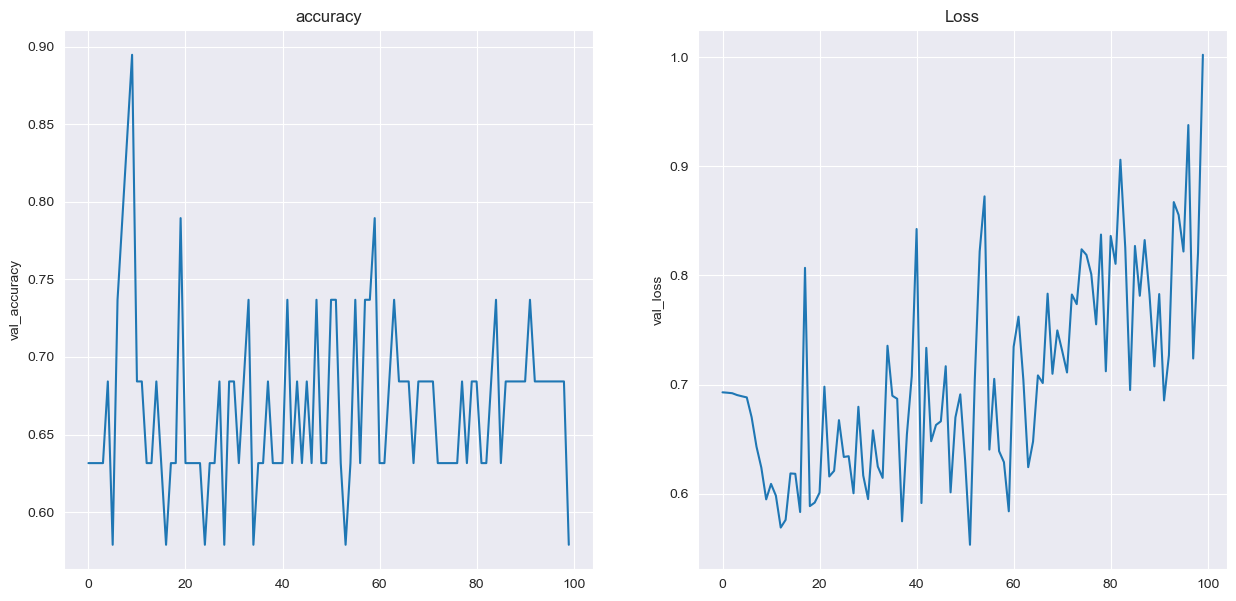

In [22]:
baseline_model = Sequential()
baseline_model.add(Dense(30, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4788 - loss: 0.6931 - val_accuracy: 0.6316 - val_loss: 0.6923
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4855 - loss: 0.6931 - val_accuracy: 0.6316 - val_loss: 0.6922
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4839 - loss: 0.6930 - val_accuracy: 0.6316 - val_loss: 0.6915
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5741 - loss: 0.6916 - val_accuracy: 0.6316 - val_loss: 0.6886
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6157 - loss: 0.6896 - val_accuracy: 0.6316 - val_loss: 0.6857
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6292 - loss: 0.6820 - val_accuracy: 0.6316 - val_loss: 0.6759
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7197 - loss: 0.6671 - val_accuracy: 0.6316 - val_loss: 0.6590
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7036 - loss: 0.6505 - val_accuracy: 0.7368 - 

,accuracy,loss,val_accuracy,val_loss
0,0.494048,0.693121,0.631579,0.692272
1,0.535714,0.692965,0.631579,0.692158
2,0.541667,0.692470,0.631579,0.691464
3,0.589286,0.691262,0.631579,0.688642
4,0.672619,0.688645,0.631579,0.685654
...,...,...,...,...
95,0.904762,0.269108,0.684211,0.785345
96,0.880952,0.275807,0.684211,0.811338
97,0.898810,0.247409,0.684211,1.148281
98,0.857143,0.336193,0.684211,0.922993


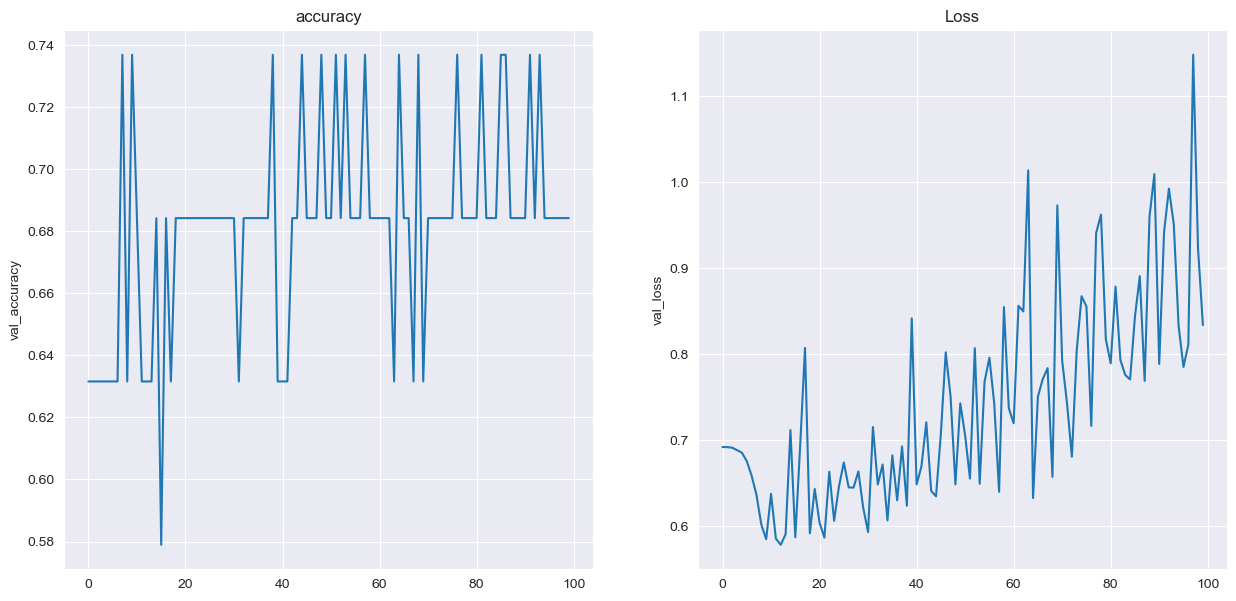

In [23]:
baseline_model = Sequential()
baseline_model.add(Dense(30, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4776 - loss: 0.6932 - val_accuracy: 0.6316 - val_loss: 0.6930
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5380 - loss: 0.6931 - val_accuracy: 0.6316 - val_loss: 0.6926
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4965 - loss: 0.6932 - val_accuracy: 0.6316 - val_loss: 0.6927
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5418 - loss: 0.6930 - val_accuracy: 0.6316 - val_loss: 0.6924
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4722 - loss: 0.6933 - val_accuracy: 0.6316 - val_loss: 0.6923
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4911 - loss: 0.6929 - val_accuracy: 0.6316 - val_loss: 0.6910
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3978 - loss: 0.6933 - val_accuracy: 0.6316 - val_loss: 0.6906
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6299 - loss: 0.6908 - val_accuracy: 0.6316 - 

,accuracy,loss,val_accuracy,val_loss
0,0.434524,0.693258,0.631579,0.692975
1,0.511905,0.693216,0.631579,0.692597
2,0.511905,0.693120,0.631579,0.692681
3,0.511905,0.693098,0.631579,0.692435
4,0.511905,0.693080,0.631579,0.692317
...,...,...,...,...
95,0.970238,0.139254,0.631579,0.955742
96,0.970238,0.125973,0.631579,0.955885
97,0.964286,0.132537,0.631579,1.030099
98,0.964286,0.129292,0.684211,1.051216


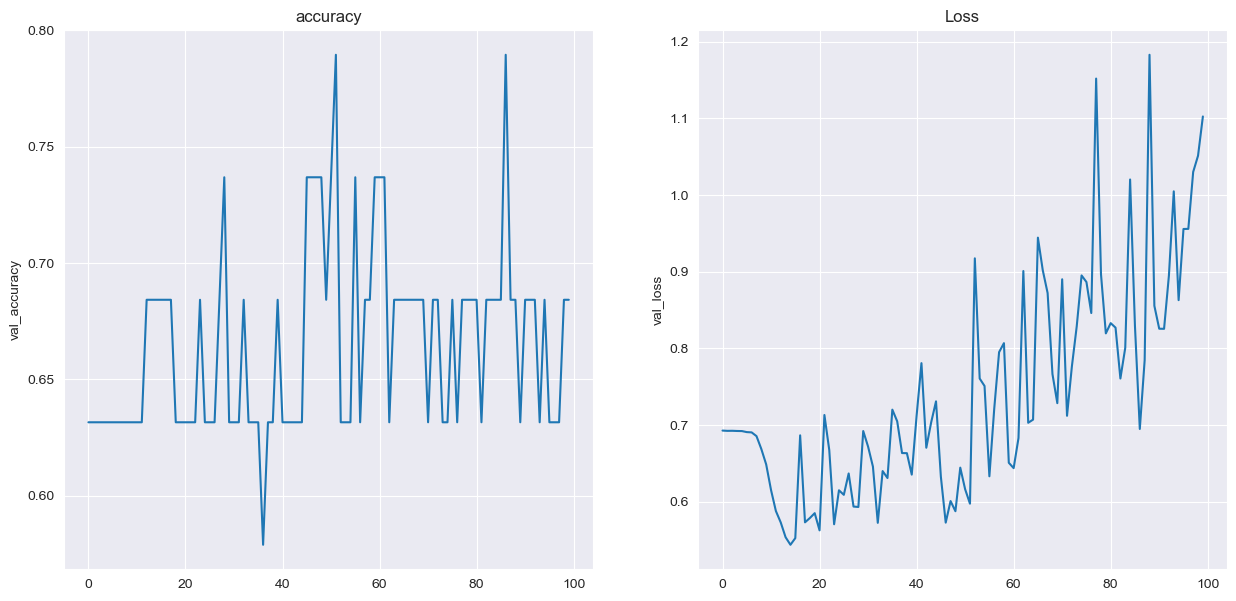

In [24]:
baseline_model = Sequential()
baseline_model.add(Dense(30, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(5, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5279 - loss: 0.6931 - val_accuracy: 0.3684 - val_loss: 0.6933
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6224 - loss: 0.6928 - val_accuracy: 0.6316 - val_loss: 0.6923
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5980 - loss: 0.6918 - val_accuracy: 0.6316 - val_loss: 0.6907
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6580 - loss: 0.6895 - val_accuracy: 0.5789 - val_loss: 0.6894
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6305 - loss: 0.6861 - val_accuracy: 0.6316 - val_loss: 0.6816
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5724 - loss: 0.6804 - val_accuracy: 0.6316 - val_loss: 0.6713
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6632 - loss: 0.6680 - val_accuracy: 0.6316 - val_loss: 0.6560
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7142 - loss: 0.6345 - val_accuracy: 0.7895 - 

,accuracy,loss,val_accuracy,val_loss
0,0.482143,0.693187,0.368421,0.693327
1,0.630952,0.692595,0.631579,0.692313
2,0.571429,0.691543,0.631579,0.690665
3,0.613095,0.689320,0.578947,0.689448
4,0.660714,0.684315,0.631579,0.681550
...,...,...,...,...
95,0.976190,0.114156,0.842105,0.642277
96,0.970238,0.108025,0.789474,0.685101
97,0.976190,0.107851,0.842105,0.611619
98,0.982143,0.097439,0.736842,0.873150


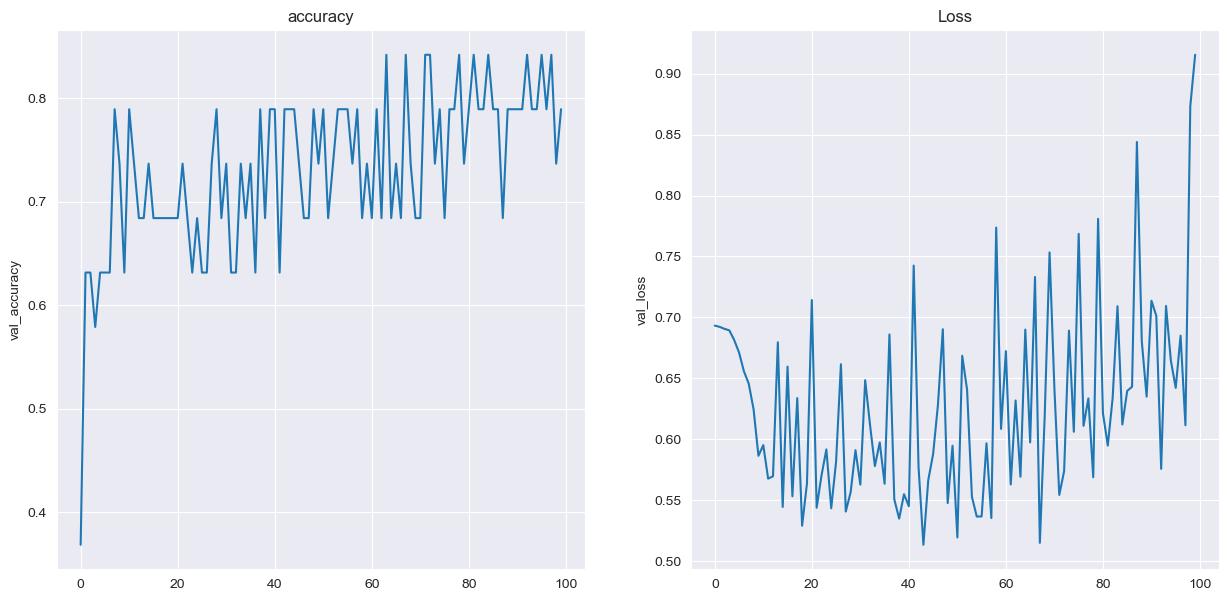

In [25]:
baseline_model = Sequential()
baseline_model.add(Dense(30, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5382 - loss: 0.6913 - val_accuracy: 0.6316 - val_loss: 0.6772
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5427 - loss: 0.6816 - val_accuracy: 0.6316 - val_loss: 0.6728
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5917 - loss: 0.6692 - val_accuracy: 0.6316 - val_loss: 0.6549
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6170 - loss: 0.6590 - val_accuracy: 0.6842 - val_loss: 0.6591
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6758 - loss: 0.6436 - val_accuracy: 0.6842 - val_loss: 0.6473
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7167 - loss: 0.6246 - val_accuracy: 0.6842 - val_loss: 0.6355
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6765 - loss: 0.6046 - val_accuracy: 0.6842 - val_loss: 0.6209
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7383 - loss: 0.5739 - val_accuracy: 0.7895 - 

,accuracy,loss,val_accuracy,val_loss
0,0.571429,0.689023,0.631579,0.677242
1,0.589286,0.678628,0.631579,0.672766
2,0.565476,0.668743,0.631579,0.654857
3,0.660714,0.656830,0.684211,0.659090
4,0.660714,0.640317,0.684211,0.647338
...,...,...,...,...
95,0.934524,0.218839,0.736842,0.551935
96,0.934524,0.216040,0.684211,0.527863
97,0.946429,0.212855,0.684211,0.543303
98,0.940476,0.213389,0.736842,0.549583


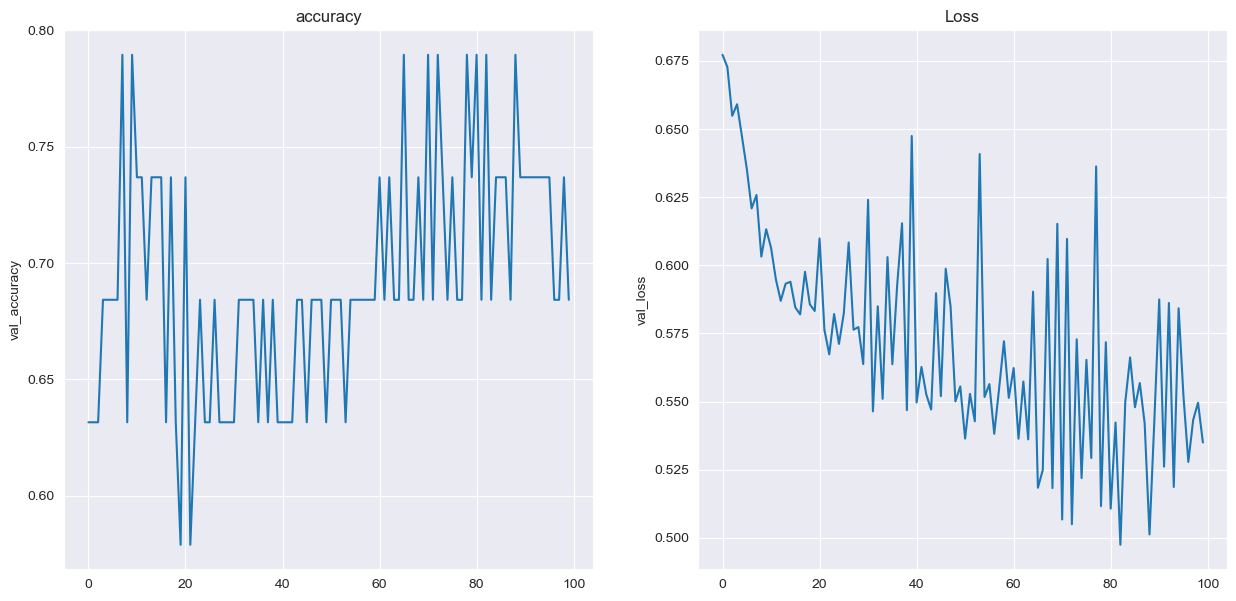

In [26]:
baseline_model = Sequential()
baseline_model.add(Dense(100, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4489 - loss: 0.6993 - val_accuracy: 0.6316 - val_loss: 0.6231
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6952 - loss: 0.6172 - val_accuracy: 0.6316 - val_loss: 0.6404
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7566 - loss: 0.5427 - val_accuracy: 0.6316 - val_loss: 0.6076
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8208 - loss: 0.5095 - val_accuracy: 0.5789 - val_loss: 0.5880
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7701 - loss: 0.4916 - val_accuracy: 0.6842 - val_loss: 0.5792
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8495 - loss: 0.4439 - val_accuracy: 0.6842 - val_loss: 0.5563
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8216 - loss: 0.4494 - val_accuracy: 0.5789 - val_loss: 0.5783
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7829 - loss: 0.4460 - val_accuracy: 0.7368 - 

,accuracy,loss,val_accuracy,val_loss
0,0.535714,0.673954,0.631579,0.623094
1,0.708333,0.592843,0.631579,0.640392
2,0.750000,0.548683,0.631579,0.607576
3,0.803571,0.504249,0.578947,0.588028
4,0.755952,0.491779,0.684211,0.579210
...,...,...,...,...
95,1.000000,0.027582,0.842105,0.378326
96,1.000000,0.030173,0.894737,0.352101
97,1.000000,0.026416,0.789474,0.410564
98,1.000000,0.027500,0.894737,0.368551


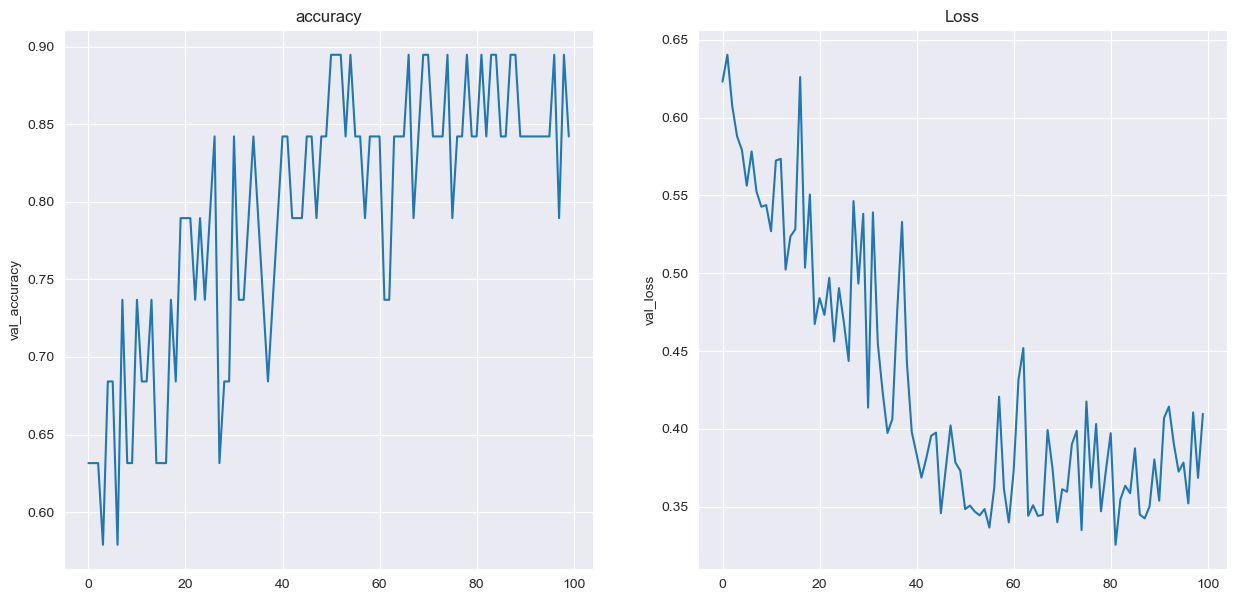

In [29]:
baseline_model = Sequential()
baseline_model.add(Dense(1000, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5046 - loss: 0.6920 - val_accuracy: 0.6316 - val_loss: 0.6836
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5209 - loss: 0.6904 - val_accuracy: 0.6316 - val_loss: 0.6813
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5994 - loss: 0.6808 - val_accuracy: 0.6316 - val_loss: 0.6777
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5813 - loss: 0.6829 - val_accuracy: 0.6316 - val_loss: 0.6748
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7051 - loss: 0.6705 - val_accuracy: 0.7368 - val_loss: 0.6701
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7070 - loss: 0.6656 - val_accuracy: 0.6316 - val_loss: 0.6644
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7523 - loss: 0.6498 - val_accuracy: 0.6842 - val_loss: 0.6673
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7734 - loss: 0.6419 - val_accuracy: 0.6316 - 

,accuracy,loss,val_accuracy,val_loss
0,0.529762,0.691108,0.631579,0.683622
1,0.601190,0.686672,0.631579,0.681282
2,0.577381,0.682833,0.631579,0.677674
3,0.672619,0.676921,0.631579,0.674784
4,0.696429,0.669524,0.736842,0.670114
...,...,...,...,...
95,0.982143,0.125693,0.736842,0.639898
96,0.982143,0.124528,0.684211,0.586085
97,0.982143,0.123487,0.736842,0.690364
98,0.982143,0.124551,0.736842,0.629936


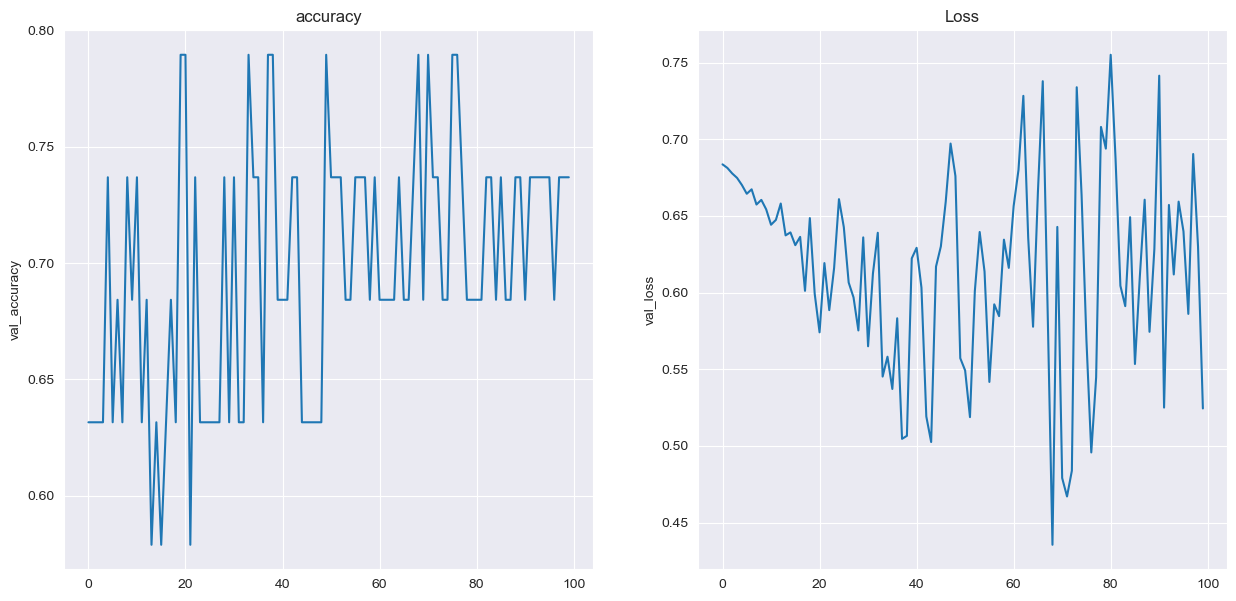

In [32]:
baseline_model = Sequential()
baseline_model.add(Dense(1000, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(5, kernel_initializer='normal', activation='sigmoid'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5195 - loss: 1.0827 - val_accuracy: 0.6316 - val_loss: 0.8759
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7899 - loss: 0.5593 - val_accuracy: 0.7368 - val_loss: 0.5050
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8519 - loss: 0.3891 - val_accuracy: 0.6842 - val_loss: 0.4934
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8350 - loss: 0.3587 - val_accuracy: 0.6842 - val_loss: 0.5805
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8202 - loss: 0.4055 - val_accuracy: 0.4737 - val_loss: 0.8877
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7821 - loss: 0.4049 - val_accuracy: 0.8421 - val_loss: 0.4269
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8381 - loss: 0.3327 - val_accuracy: 0.6842 - val_loss: 0.5786
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8978 - loss: 0.2983 - val_accuracy: 0.7895 - 

,accuracy,loss,val_accuracy,val_loss
0,0.553571,0.938610,0.631579,0.875851
1,0.809524,0.490615,0.736842,0.505021
2,0.833333,0.408999,0.684211,0.493421
3,0.791667,0.428909,0.684211,0.580491
4,0.833333,0.395839,0.473684,0.887735
...,...,...,...,...
95,1.000000,0.003056,0.894737,0.311163
96,1.000000,0.003117,0.894737,0.308879
97,1.000000,0.003385,0.894737,0.309898
98,1.000000,0.002856,0.894737,0.309105


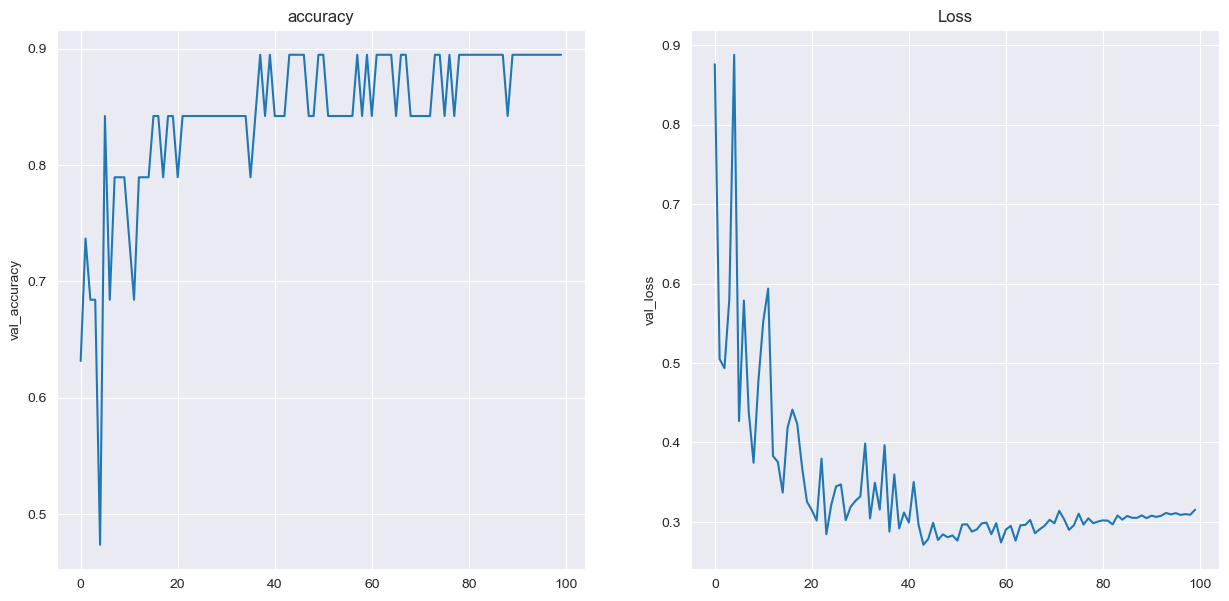

In [33]:
baseline_model = Sequential()
baseline_model.add(Dense(10_000, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

In [ ]:
baseline_model = Sequential()
baseline_model.add(Dense(1_000_000, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 383ms/step - accuracy: 0.5334 - loss: 90.7705 - val_accuracy: 0.7368 - val_loss: 14.9088
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.8024 - loss: 13.1023 - val_accuracy: 0.5789 - val_loss: 8.6826
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.7889 - loss: 11.8125 - val_accuracy: 0.7895 - val_loss: 2.6672
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step - accuracy: 0.7782 - loss: 8.6918 - val_accuracy: 0.8421 - val_loss: 2.1973
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step - accuracy: 0.8251 - loss: 8.5575 - val_accuracy: 0.5789 - val_loss: 37.3670
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 386ms/step - accuracy: 0.7566 - loss: 13.5507 - val_accuracy: 0.7368 - val_loss: 14.8286
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - accuracy: 0.8337 - loss: 8.4842 - val_accuracy: 0.8421 - val_loss: 5.6413
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 391ms/step - accuracy: 0.8497 - loss: 5.7557 - 